In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [4]:
propeller = pd.read_csv('propeller_data.csv')

In [5]:
positions = [33, 66]

In [6]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [15]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [12]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2


In [64]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

7
11
9
11


In [98]:
x = [1, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.1, 0.0750, 0.05, 0.025, 0.0125, 0]
x_list, y_right_list, y_left_list, right_pts, left_pts, rm = get_generated_points_xfoil(x, right_param, left_param, right_pts, left_pts)

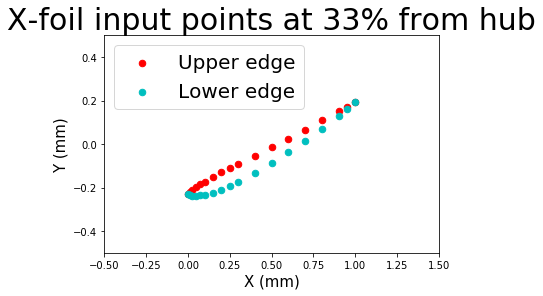

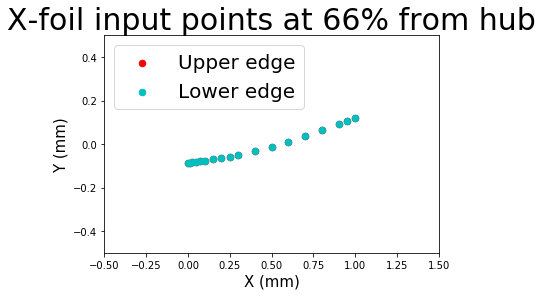

In [105]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )

In [116]:
xfoil_input_data(x, y_right_list[0], y_left_list[0], positions[0])